<a href="https://colab.research.google.com/github/safaraalfia/Yolov8-DeteksiObjek/blob/main/Yolov8-DeteksiMotor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Step 1: Install necessary libraries
!pip install ultralytics  # Install YOLOv8
!pip install matplotlib opencv-python-headless
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [6]:
# Step 2: Import libraries
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import files
import cv2
import numpy as np


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LuNXCgqzh3opWhWacuBv")
project = rf.workspace("uasdeteksi").project("motor-models-detection-2")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Motor-Models-Detection-2-2 in yolov8:: 100%|██████████| 202/202 [00:00<00:00, 6618.36it/s]


In [8]:
import os

# Lihat folder tempat dataset diunduh
dataset_location = dataset.location  # dari RoboFlow download
print("Dataset downloaded to:", dataset_location)

Dataset downloaded to: /content/Motor-Models-Detection-2-2


In [9]:
from ultralytics import YOLO

# Buat model YOLOv8 baru
model = YOLO("yolov8n.pt")  # "yolov8n.pt" adalah versi YOLOv8 Nano

# Jalankan pelatihan dengan dataset
model.train(data="/content/Motor-Models-Detection-2-2/data.yaml", epochs=5, imgsz=640)

100%|██████████| 6.25M/6.25M [00:00<00:00, 134MB/s]


Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Motor-Models-Detection-2-2/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

100%|██████████| 755k/755k [00:00<00:00, 20.6MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 22        [15, 18, 21]  1    751507  ultralytics.nn.modules.head.Detect           [1, [64, 128, 256]]           
Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 514.7±117.5 MB/s, size: 48.9 KB)


train: Scanning /content/Motor-Models-Detection-2-2/train/labels... 75 images, 1 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 808.12it/s]

train: New cache created: /content/Motor-Models-Detection-2-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 368.6±96.0 MB/s, size: 39.0 KB)


val: Scanning /content/Motor-Models-Detection-2-2/valid/labels... 10 images, 1 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 1198.34it/s]

val: New cache created: /content/Motor-Models-Detection-2-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25         0G      1.136      2.742      1.448         39        640: 100%|██████████| 5/5 [01:22<00:00, 16.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.35s/it]

                   all         10         12      0.004          1      0.532      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25         0G      1.011      2.178      1.322         26        640: 100%|██████████| 5/5 [01:05<00:00, 13.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]

                   all         10         12      0.004          1      0.775       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25         0G      0.972      1.595      1.286         35        640: 100%|██████████| 5/5 [01:06<00:00, 13.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]

                   all         10         12      0.245      0.917      0.799      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25         0G      1.072      1.613      1.314         36        640: 100%|██████████| 5/5 [01:07<00:00, 13.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]

                   all         10         12    0.00333      0.833       0.75      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25         0G      1.019      1.499      1.294         31        640: 100%|██████████| 5/5 [01:08<00:00, 13.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]

                   all         10         12          1       0.29      0.646       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25         0G     0.9757      1.436       1.27         27        640: 100%|██████████| 5/5 [01:04<00:00, 12.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]

                   all         10         12          1      0.246      0.494      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25         0G     0.9126      1.378      1.208         26        640: 100%|██████████| 5/5 [01:02<00:00, 12.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.86s/it]

                   all         10         12          1      0.198      0.476      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25         0G     0.9936      1.415      1.279         43        640: 100%|██████████| 5/5 [01:07<00:00, 13.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]

                   all         10         12          1      0.206      0.504      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25         0G     0.9331       1.37      1.239         30        640: 100%|██████████| 5/5 [01:03<00:00, 12.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]

                   all         10         12      0.835      0.421      0.674      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25         0G      1.003      1.395      1.288         26        640: 100%|██████████| 5/5 [01:02<00:00, 12.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]

                   all         10         12          1       0.53      0.713      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25         0G      1.035      1.373       1.29         41        640: 100%|██████████| 5/5 [01:02<00:00, 12.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]

                   all         10         12          1      0.498      0.726      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25         0G     0.9566      1.364       1.26         21        640: 100%|██████████| 5/5 [01:03<00:00, 12.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]

                   all         10         12      0.889      0.669      0.738      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25         0G     0.9762       1.33      1.293         42        640: 100%|██████████| 5/5 [01:04<00:00, 12.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]

                   all         10         12       0.89      0.671      0.738       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25         0G      0.977      1.246      1.259         53        640: 100%|██████████| 5/5 [01:03<00:00, 12.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]

                   all         10         12      0.814       0.75      0.676      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25         0G     0.9421      1.242      1.255         34        640: 100%|██████████| 5/5 [01:00<00:00, 12.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]

                   all         10         12      0.982      0.667      0.731      0.526


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25         0G     0.7788      1.415      1.146         14        640: 100%|██████████| 5/5 [01:01<00:00, 12.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]

                   all         10         12      0.854      0.667      0.695      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25         0G     0.8545      1.427      1.202         17        640: 100%|██████████| 5/5 [01:03<00:00, 12.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.38s/it]

                   all         10         12      0.645      0.583      0.521      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25         0G     0.8624      1.376      1.192         24        640: 100%|██████████| 5/5 [01:00<00:00, 12.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.55s/it]

                   all         10         12      0.851      0.667      0.691      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25         0G     0.7539      1.407       1.19         13        640: 100%|██████████| 5/5 [01:02<00:00, 12.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]

                   all         10         12      0.744      0.583      0.614       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25         0G     0.8162      1.346      1.209         15        640: 100%|██████████| 5/5 [01:03<00:00, 12.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]

                   all         10         12      0.858      0.583      0.625       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25         0G     0.7256      1.248      1.141         13        640: 100%|██████████| 5/5 [01:03<00:00, 12.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]

                   all         10         12      0.861      0.583      0.611      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25         0G     0.7558      1.219      1.114         20        640: 100%|██████████| 5/5 [01:01<00:00, 12.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]

                   all         10         12      0.866      0.583      0.723      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25         0G     0.6911      1.115       1.07         20        640: 100%|██████████| 5/5 [01:01<00:00, 12.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]

                   all         10         12      0.991       0.75      0.802      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25         0G     0.6667      1.141      1.052         14        640: 100%|██████████| 5/5 [01:00<00:00, 12.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]

                   all         10         12      0.884      0.833      0.882      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25         0G     0.7832      1.193      1.189         17        640: 100%|██████████| 5/5 [01:00<00:00, 12.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]

                   all         10         12          1      0.823      0.898      0.673



25 epochs completed in 0.468 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


                   all         10         12          1      0.823      0.898      0.673
Speed: 3.2ms preprocess, 222.2ms inference, 0.0ms loss, 6.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cb2a39d5dd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [10]:
dataset = version.download("yolov8")

In [11]:
result = model.predict(source="/content/Motor-Models-Detection-2-2/valid/images", save=True, imgsz=640)


image 1/10 /content/Motor-Models-Detection-2-2/valid/images/istockphoto-1967916673-612x612_jpg.rf.72f7591a0b85d1cd52472679f7a97aeb.jpg: 640x640 1 motor, 247.9ms
image 2/10 /content/Motor-Models-Detection-2-2/valid/images/istockphoto-1984171705-612x612_jpg.rf.43c7dc7e03c3eb326b6a95c77a990538.jpg: 640x640 2 motors, 221.8ms
image 3/10 /content/Motor-Models-Detection-2-2/valid/images/istockphoto-2083542212-612x612_jpg.rf.36707436e9be4ebd0aef398faf48dcfb.jpg: 640x640 (no detections), 213.8ms
image 4/10 /content/Motor-Models-Detection-2-2/valid/images/istockphoto-2092164194-612x612_jpg.rf.b6b1b87e209dd091a08dd762519ce0b5.jpg: 640x640 2 motors, 320.4ms
image 5/10 /content/Motor-Models-Detection-2-2/valid/images/istockphoto-2150268258-612x612_jpg.rf.83d572dbb3e74105f1e03725f1d9358f.jpg: 640x640 2 motors, 202.0ms
image 6/10 /content/Motor-Models-Detection-2-2/valid/images/istockphoto-2153269171-612x612_jpg.rf.4cce3a71e6815823c925b76db58079a3.jpg: 640x640 1 motor, 218.6ms
image 7/10 /content/Mo

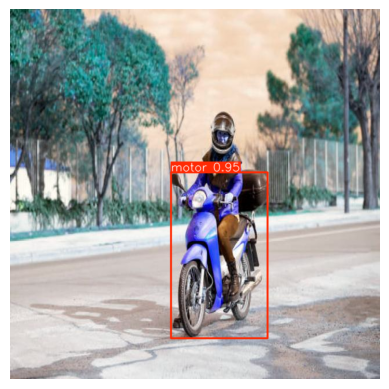

In [12]:
# Ambil elemen pertama dari hasil prediksi
image_result = result[0]

# Menampilkan hasil deteksi
from IPython.display import Image, display
image_path_with_predictions = image_result.plot()  # Mengembalikan array gambar

# Tampilkan menggunakan Matplotlib
import matplotlib.pyplot as plt
plt.imshow(image_path_with_predictions)
plt.axis("off")
plt.show()

In [17]:
# Step 3: Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

Saving istockphoto-2086786836-612x612_jpg.rf.36579b7cf68bfed147295c2661233b41.jpg to istockphoto-2086786836-612x612_jpg.rf.36579b7cf68bfed147295c2661233b41.jpg


In [19]:
# Step 4: Load YOLO model
model = YOLO('yolov8n.pt')  # Use a pre-trained YOLOv8 model (nano version for speed)

In [20]:
# Step 5: Perform object detection
results = model(image_path)  # Run inference on the uploaded image


image 1/1 /content/istockphoto-2086786836-612x612_jpg.rf.36579b7cf68bfed147295c2661233b41.jpg: 640x640 2 motorcycles, 235.1ms
Speed: 4.1ms preprocess, 235.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


In [21]:
# Step 6: Visualize results
# Save the annotated image
annotated_img = results[0].plot()  # Create an annotated image (numpy array)

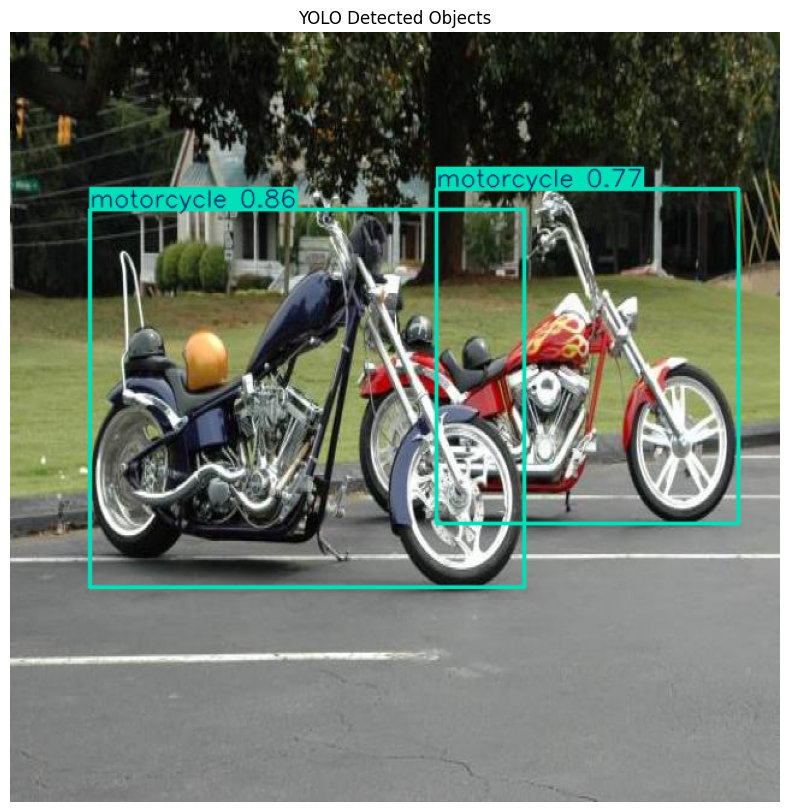

In [23]:
# Display the annotated image using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("YOLO Detected Objects")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')